#Sankalp Rajendran
##IIT2019173

##Question1

###Erosion

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def erode(img1,k):
    #Acquire size of the image
    m,n= img1.shape 
    # Define the structuring element
    SE= np.ones((k,k), dtype=np.uint8)
    constant= (k-1)//2
    #Define new image
    imgErode= np.zeros((m,n), dtype=np.uint8)
    #Erosion without using inbuilt cv2 function for morphology
    for i in range(constant, m-constant):
        for j in range(constant,n-constant):
            temp= img1[i-constant:i+constant+1, j-constant:j+constant+1]
            product= temp*SE
            imgErode[i,j]= np.min(product)

    plt.imshow(imgErode,cmap='gray',vmin=0,vmax=255)
    plt.show
    return imgErode
def dilate(img1,k):
    m,n= img1.shape 

    # Define the structuring element
    SE= np.ones((k,k), dtype=np.uint8)
    constant= (k-1)//2
    #Define new image
    imgDilate= np.zeros((m,n), dtype=np.uint8)
    #Erosion without using inbuilt cv2 function for morphology
    for i in range(constant, m-constant):
        for j in range(constant,n-constant):
            temp= img1[i-constant:i+constant+1, j-constant:j+constant+1]
            product= temp*SE
            imgDilate[i,j]= np.max(product)
    plt.imshow(imgDilate,cmap='gray',vmin=0,vmax=255)
    plt.show
    return imgDilate

<function matplotlib.pyplot.show(close=None, block=None)>

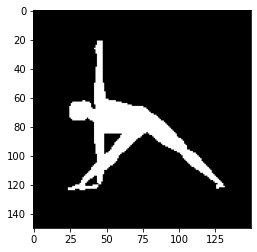

In [38]:
img1=cv2.imread("input3.bmp",0)
plt.imshow(img1,cmap='gray',vmin=0,vmax=255)
plt.show

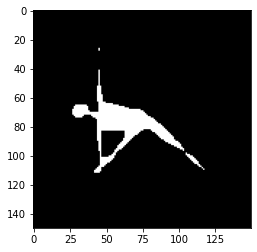

In [39]:
erode(img1,5)

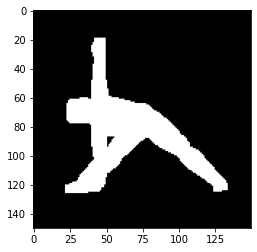

In [40]:
dilate(img1,5)

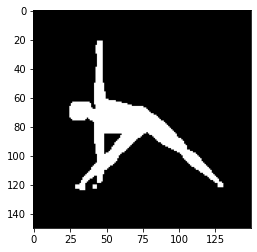

In [51]:
eroded = erode(img1,3)
dilated = dilate(eroded,3)

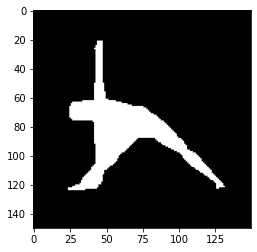

In [48]:
dilated = dilate(img1,11)
eroded = erode(dilated,11)

<function matplotlib.pyplot.show(close=None, block=None)>

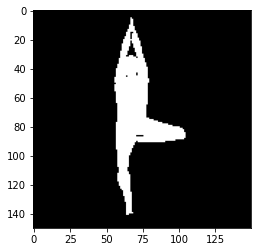

In [34]:
img2=cv2.imread("input4.bmp",0)
plt.imshow(img2,cmap='gray',vmin=0,vmax=255)
plt.show

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

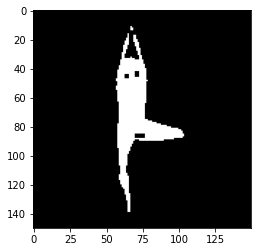

In [52]:
erode(img2,3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

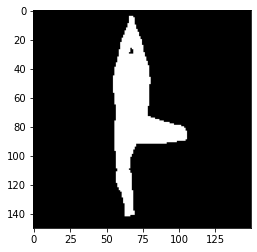

In [53]:
dilate(img2,3)

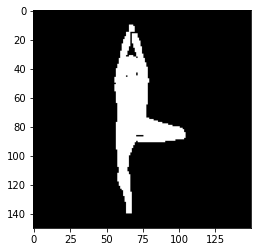

In [54]:
eroded = erode(img2,3)
dilated = dilate(eroded,3)

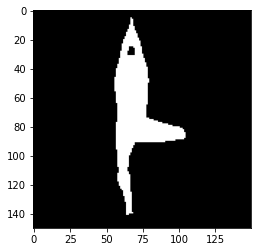

In [58]:
dilated = dilate(img2,3)
eroded = erode(dilated,3)

##Question 2(hit and miss)

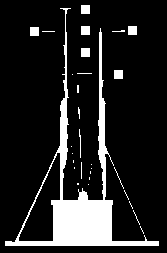

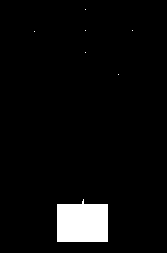

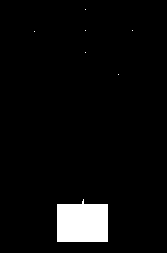

In [ ]:
img= cv2.imread("input5.bmp",0)
m,n = img.shape
imgc = np.zeros([m, n])
#taking complement of image
for i in range(m):
    for j in range(n):
        imgc[i,j] = ~img[i,j]


#performing erosion on image
img1 = erosion(img,3)
img2 = erosion(img,11)

#showing images
cv2_imshow(img1)
cv2_imshow(img2)



final_img = np.zeros([m, n])

#hit and miss can be defined as and operation on two images eroded with different structuring elements

#performing and operation on erosion results
for i in range(m):
    for j in range(n):
        final_img[i,j] = img1[i,j] & img2[i,j]

#centres of triangles can be seens plotted in image
cv2_imshow(final_img)

##Question 3

###Thickening

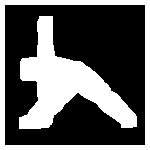

In [ ]:
img= cv2.imread("input3.bmp",0)

m,n = img.shape

imgc = np.zeros([m, n])
thin = np.zeros([m,n])

#taking complement of image
for i in range(m):
    for j in range(n):
        imgc[i,j] = ~img[i,j]


img1 = imgc.copy()

erode = erosion(img1,11)


# Opening on eroded image
eroded = erosion(erode,5)
dilated = dilation(eroded,5)
opening = dilated.copy()


# Subtract these two
openingc = np.zeros([m, n])
subset = np.zeros([m,n])
for i in range(m):
    for j in range(n):
        openingc[i,j] = ~opening[i,j]
        subset[i,j] = erode[i,j] & opening[i,j]


# Union of all previous sets
    for i in range(m):
        for j in range(n):
            x = int(subset[i,j])
            y = int(thin[i,j])
            thin[i,j] = (x | y)


# Set the eroded image for next iteration
img1 = erode.copy()

for i in range(m):
  for j in range(n):
    img1[i,j] = ~img1[i,j]

cv2_imshow(img1)

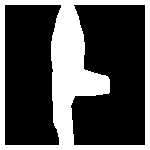

In [ ]:
img= cv2.imread("input4.bmp",0)

m,n = img.shape

imgc = np.zeros([m, n])
thin = np.zeros([m,n])

#taking complement of image
for i in range(m):
    for j in range(n):
        imgc[i,j] = ~img[i,j]

img1 = imgc.copy()

erode = erosion(img1,11)

# Opening on eroded image
eroded = erosion(erode,5)
dilated = dilation(eroded,5)
opening = dilated.copy()
# Subtract these two
openingc = np.zeros([m, n])
subset = np.zeros([m,n])
for i in range(m):
    for j in range(n):
        openingc[i,j] = ~opening[i,j]
        subset[i,j] = erode[i,j] & opening[i,j]

# Union of all previous sets
    for i in range(m):
        for j in range(n):
            x = int(subset[i,j])
            y = int(thin[i,j])
            thin[i,j] = (x | y)

# Set the eroded image for next iteration
img1 = erode.copy()

for i in range(m):
    for j in range(n):
        img1[i,j] = ~img1[i,j]

cv2_imshow(img1)

###Skeleton

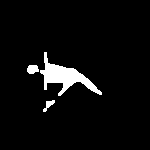

In [ ]:
img= cv2.imread("input3.bmp",0)

m,n = img.shape
#erosion
erode = erosion(img,2)
#opening
eroded = erosion(erode,7)
dilated = dilation(eroded,3)
opening = dilated.copy()
# Subtract these two
openingc = np.zeros([m, n])
subset = np.zeros([m,n])
for i in range(m):
  for j in range(n):
    openingc[i,j] = ~opening[i,j]
    subset[i,j] = erode[i,j] & opening[i,j]

cv2_imshow(subset)


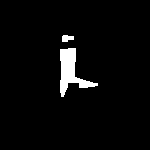

In [ ]:
img= cv2.imread("input4.bmp",0)

m,n = img.shape
#erosion
erode = erosion(img,3)
#opening
eroded = erosion(erode,7)
dilated = dilation(eroded,3)
opening = dilated.copy()
# Subtract these two
openingc = np.zeros([m, n])
subset = np.zeros([m,n])
for i in range(m):
  for j in range(n):
    openingc[i,j] = ~opening[i,j]
    subset[i,j] = erode[i,j] & opening[i,j]

cv2_imshow(subset)